In [1]:
import pandas as pd
from glob import glob

files = sorted(glob("results/config_2/tracks/csv\\tracks_*_interp.csv"))
print(files)
dfs = [pd.read_csv(f, sep=';') for f in files]
tracks = pd.concat(dfs)
tracks.head()

['results/config_2/tracks/csv\\tracks_0000_interp.csv', 'results/config_2/tracks/csv\\tracks_0001_interp.csv', 'results/config_2/tracks/csv\\tracks_0002_interp.csv', 'results/config_2/tracks/csv\\tracks_0003_interp.csv', 'results/config_2/tracks/csv\\tracks_0004_interp.csv', 'results/config_2/tracks/csv\\tracks_0005_interp.csv', 'results/config_2/tracks/csv\\tracks_0006_interp.csv', 'results/config_2/tracks/csv\\tracks_0007_interp.csv', 'results/config_2/tracks/csv\\tracks_0008_interp.csv', 'results/config_2/tracks/csv\\tracks_0009_interp.csv', 'results/config_2/tracks/csv\\tracks_0010_interp.csv', 'results/config_2/tracks/csv\\tracks_0011_interp.csv', 'results/config_2/tracks/csv\\tracks_0012_interp.csv', 'results/config_2/tracks/csv\\tracks_0013_interp.csv', 'results/config_2/tracks/csv\\tracks_0014_interp.csv', 'results/config_2/tracks/csv\\tracks_0015_interp.csv', 'results/config_2/tracks/csv\\tracks_0016_interp.csv', 'results/config_2/tracks/csv\\tracks_0017_interp.csv', 'results/

,pos_0,pos_1,pos_2,velocity_0,velocity_1,velocity_2,time,track_ind
0,42.714266,-0.267462,-2.160848,-0.638768,8.484408,13.165281,0.000000,0.0
1,42.713865,-0.262127,-2.152570,-0.638768,8.484408,13.165281,0.000629,0.0
2,42.713463,-0.256792,-2.144293,-0.638768,8.484408,13.165281,0.001258,0.0
3,42.713061,-0.251458,-2.136015,-0.638768,8.484408,13.165281,0.001886,0.0
4,42.713968,-0.246018,-2.129479,1.662456,9.971504,11.980117,0.002432,0.0


2025-12-08 18:32:28.941 (  15.119s) [    7EFBA59F8740]vtkXOpenGLRenderWindow.:1458  WARN| bad X server connection. DISPLAY=
/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


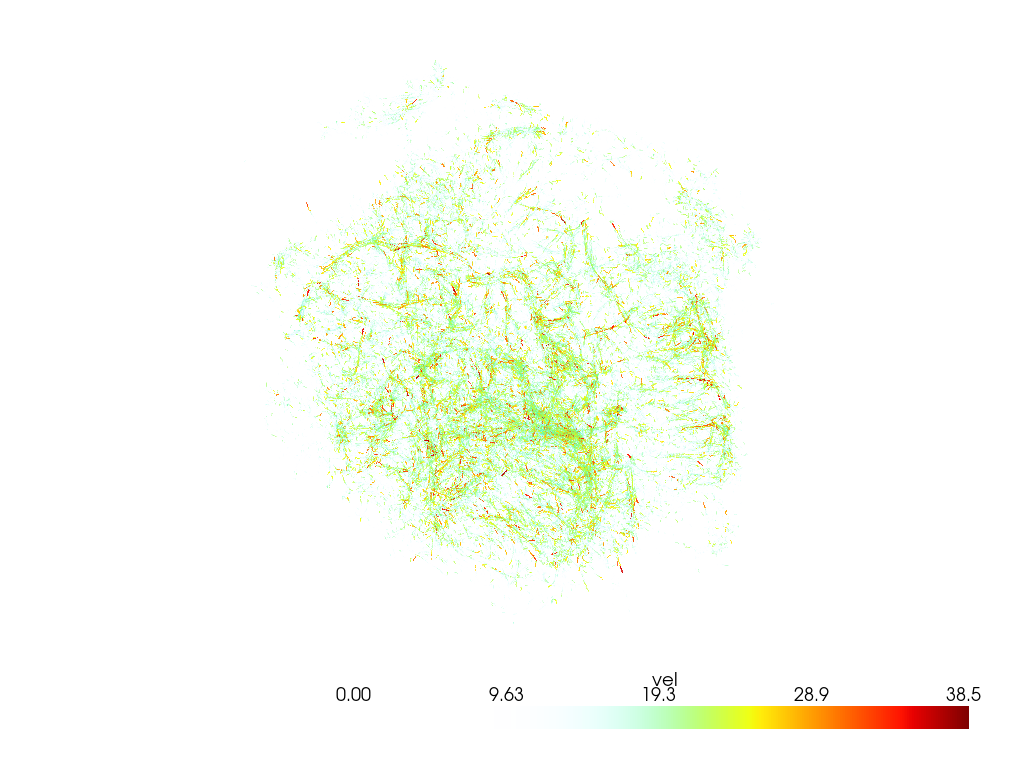

In [1]:
import pyvista as pv
import numpy as np

density = np.load("result/volume/density.npy").astype(float)
velocity = np.load("result/volume/velocity.npy").astype(float)

grid = pv.wrap(density)
grid.point_data["vel"] = velocity.flatten(order='F')

p = pv.Plotter()
p.add_volume(grid, scalars="vel", cmap='jet', opacity='sigmoid')
p.show()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


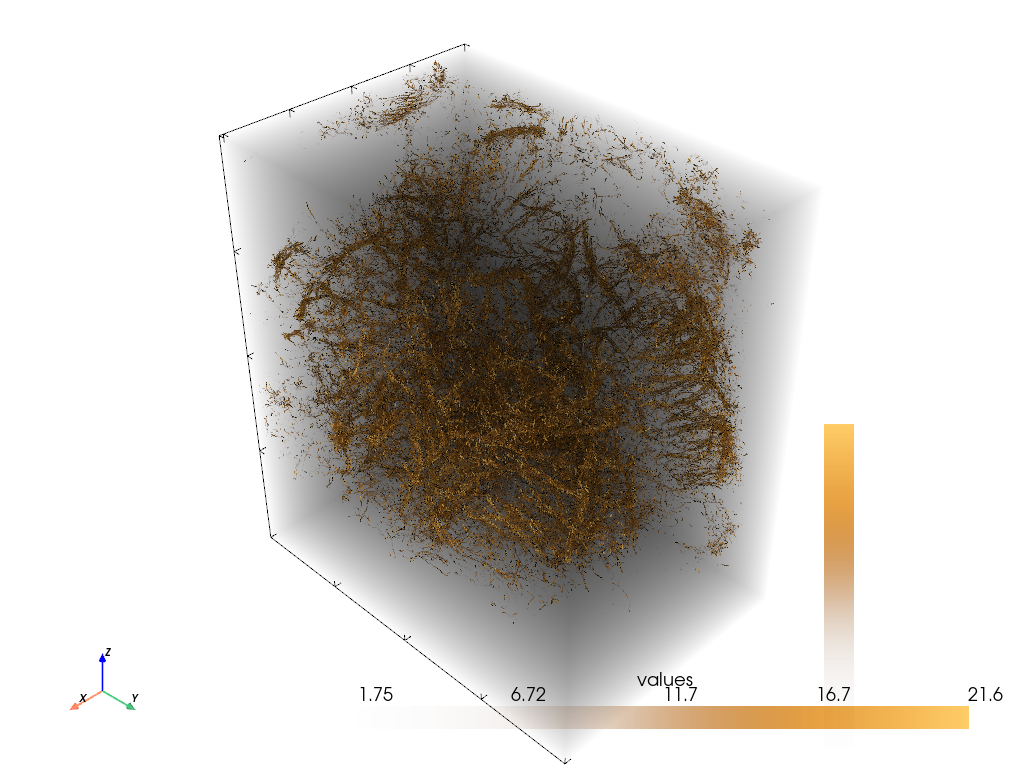

In [4]:
import numpy as np
import pyvista as pv

vel = np.load("result/volume/velocity.npy")

vmax = np.percentile(vel[vel>0], 98)
vel = np.clip(vel, 0, vmax)

volume = pv.wrap(vel)

p = pv.Plotter()

p.add_volume(
    volume,
    cmap="jet",
    opacity="sigmoid"
)

p.enable_depth_peeling()

# bounding box
p.show_bounds(
    grid='back',
    location='outer',
    font_size=10,
    use_2d=False,
)

# 3D axes widget
p.add_axes()

p.show()

Threshold = 17.603282928466797


/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/pyvista/core/utilities/points.py:79: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


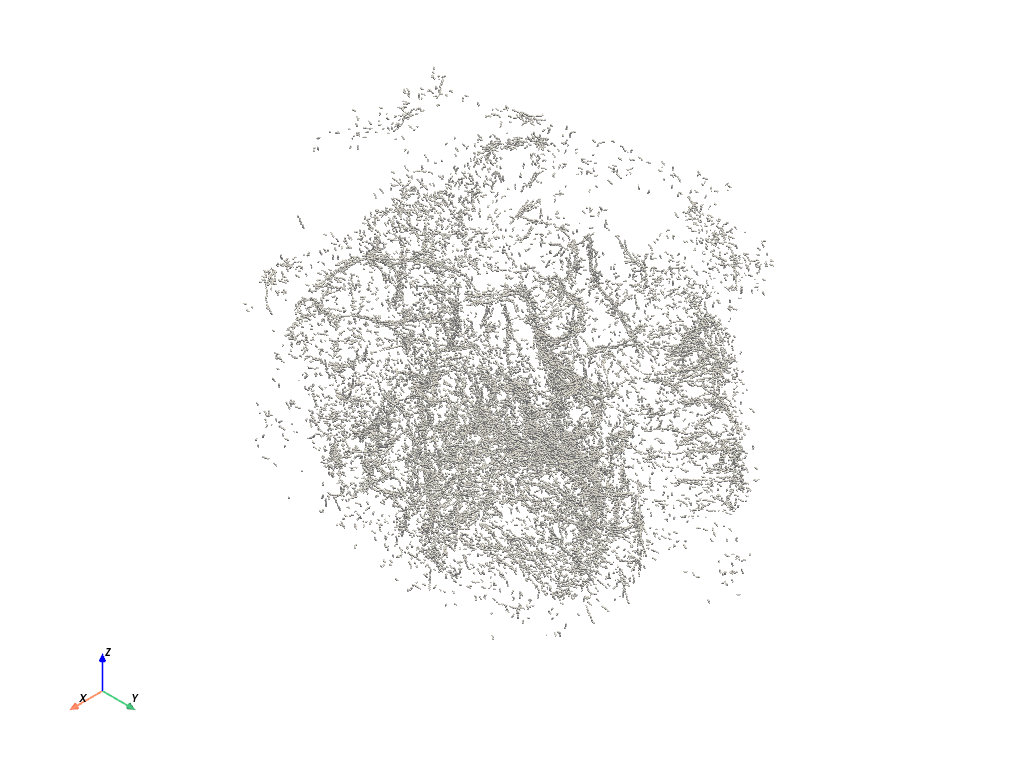

In [3]:
import numpy as np
from skimage.morphology import skeletonize
import pyvista as pv

# load your velocity volume
vel = np.load("result/volume/velocity.npy")

# threshold based on percentile, tune this!!
thr = np.percentile(vel[vel>0], 95)
mask = vel > thr         # binary

print("Threshold =", thr)

# skeletonization (3D)
skeleton = skeletonize(mask.astype(np.uint8))

# convert skeleton to point cloud (x,y,z)
pts = np.transpose(np.nonzero(skeleton))

# visualize skeleton in 3D (scatter)
cloud = pv.PolyData(pts)

p = pv.Plotter()
p.add_points(
    cloud,
    render_points_as_spheres=True,
    point_size=2,
    color='white'
)

p.add_axes()
p.show()

In [9]:
vol = pv.wrap(data)

p = pv.Plotter()
p.add_volume(
    vol,
    cmap="inferno",
    opacity='sigmoid_5',
    shade=True,
    diffuse=0.8,
    specular=0.3,
    specular_power=20,
)
p.show_grid()
p.show_axes()
p.enable_depth_peeling()  

True

In [8]:
density.shape

(407, 590, 640)

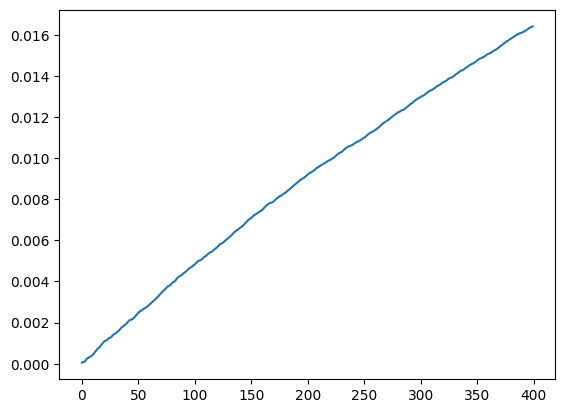

In [10]:
import matplotlib.pyplot as plt
saturation_curve = np.load("result/volume/saturation_curve.npy").astype(float)
plt.plot(saturation_curve)

In [13]:
directivity =  np.load("result/volume/directivity.npy").astype(float)
directivity

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


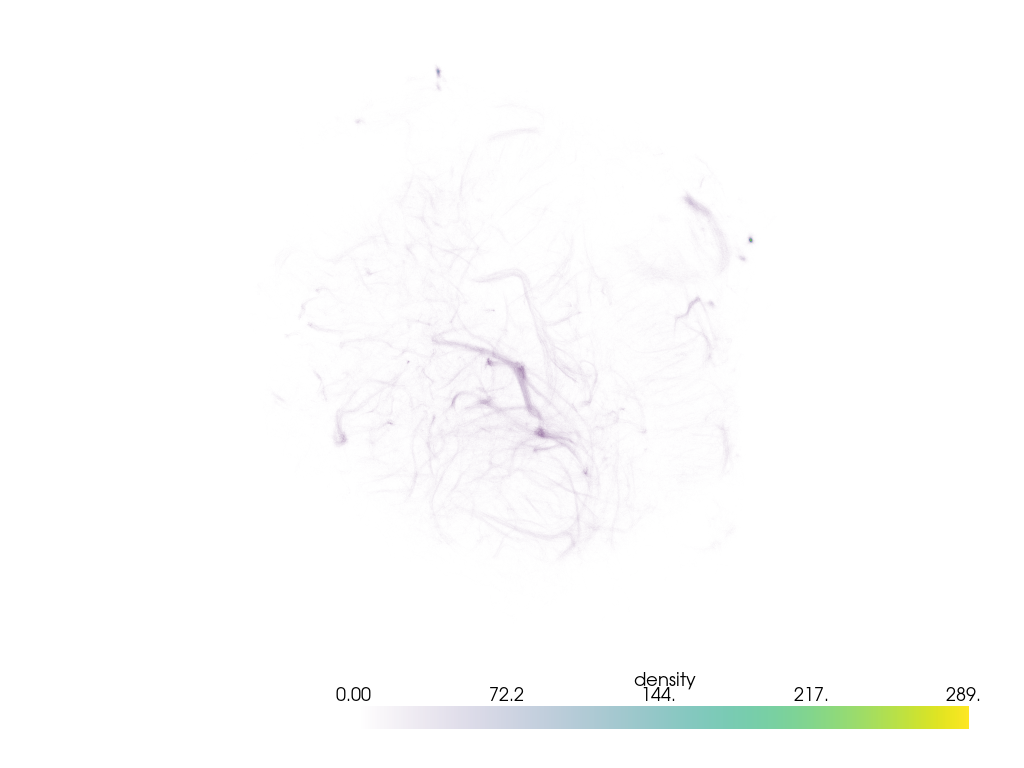

In [15]:
import pyvista as pv

density = np.load("result/volume/density.npy").astype(float)
grid = pv.wrap(density)
grid.point_data["density"] = density.flatten(order='F')

p = pv.Plotter()
p.add_volume(grid,scalars="density")
p.show()     # saves a picture

/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


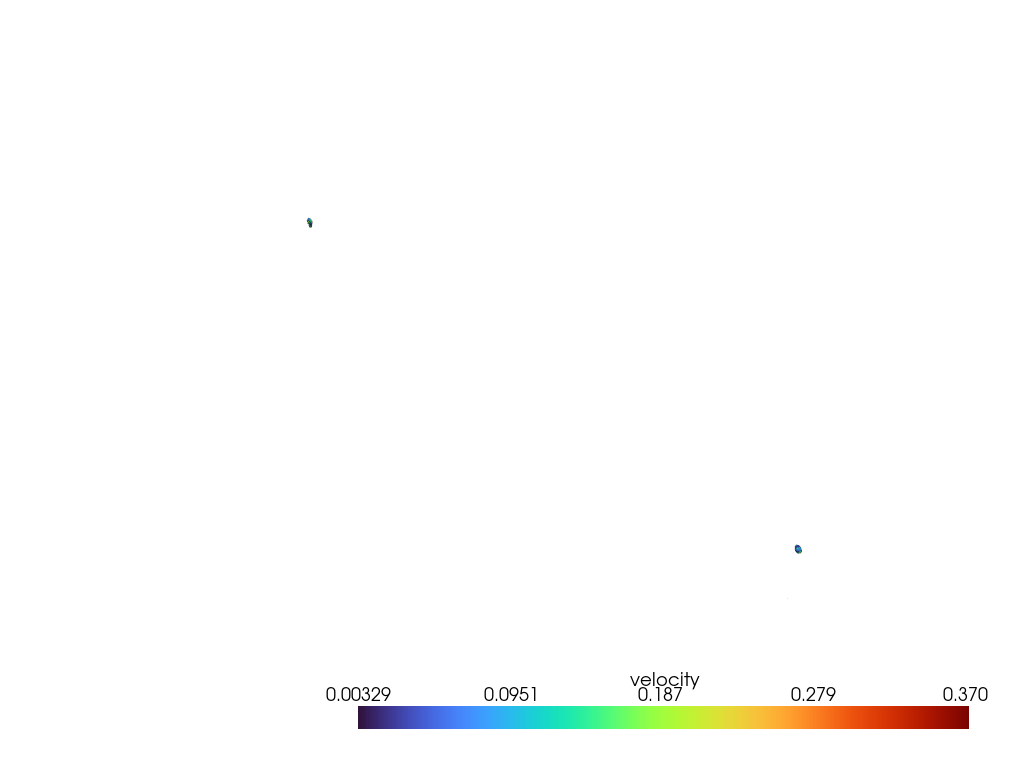

In [16]:
v = np.zeros_like(density)
v[density>0] = velocity[density>0]

grid = pv.wrap(density)
grid["velocity"] = v.ravel(order="F")

contour = grid.contour()
p = pv.Plotter()
p.add_mesh(contour, scalars="velocity", cmap="turbo")
p.show()

In [18]:
import os
import shutil
from glob import glob

base = "results/config_2/tracks"

for filepath in glob(os.path.join(base, "*")):
    # Skip folders
    if os.path.isdir(filepath):
        continue

    # Extension without dot → upper
    ext = os.path.splitext(filepath)[1][1:].upper()  # e.g. 'CSV'

    # Create new folder inside tracks/
    new_folder = os.path.join(base, ext)
    os.makedirs(new_folder, exist_ok=True)

    # Destination path
    new_path = os.path.join(new_folder, os.path.basename(filepath).split("\\")[1])

    # Move file
    shutil.move(filepath, new_path)

    print(f"Moved: {filepath} → {new_path}")

Moved: results/config_2/tracks/csv\tracks_0331_raw.csv → results/config_2/tracks/CSV/tracks_0331_raw.csv
Moved: results/config_2/tracks/npz\tracks_0368.npz → results/config_2/tracks/NPZ/tracks_0368.npz
Moved: results/config_2/tracks/hdf5\tracks_0316.hdf5 → results/config_2/tracks/HDF5/tracks_0316.hdf5
Moved: results/config_2/tracks/csv\tracks_0253_raw.csv → results/config_2/tracks/CSV/tracks_0253_raw.csv
Moved: results/config_2/tracks/npz\tracks_0179.npz → results/config_2/tracks/NPZ/tracks_0179.npz
Moved: results/config_2/tracks/hdf5\tracks_0346.hdf5 → results/config_2/tracks/HDF5/tracks_0346.hdf5
Moved: results/config_2/tracks/csv\tracks_0145_interp.csv → results/config_2/tracks/CSV/tracks_0145_interp.csv
Moved: results/config_2/tracks/csv\tracks_0144_raw.csv → results/config_2/tracks/CSV/tracks_0144_raw.csv
Moved: results/config_2/tracks/csv\tracks_0304_raw.csv → results/config_2/tracks/CSV/tracks_0304_raw.csv
Moved: results/config_2/tracks/csv\tracks_0117_raw.csv → results/config_2